In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
#display.[max_categories, max_columns, max_colwidth, max_info_columns, max_info_rows, max_rows, min_rows]
pd.set_option('display.max_rows', 50) # показывать указанное количество строк
pd.set_option('display.max_columns', 50) # показывать указанное количество колонок

In [3]:
students = pd.read_csv('stud_math.csv')

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.

3. Оцените количество уникальных значений для номинативных переменных.

4. По необходимости преобразуйте данные

5. Проведите корреляционный анализ количественных переменных

6. Отберите не коррелирующие переменные.

7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [7]:
# Для удобства использования переименуем названия столбцов
# Уберем длинные нзвания и заглавные буквы
students.columns = [column_name.lower() for column_name in students.columns]
students.rename({'studytime, granular':'studytimegranular'}, axis='columns', inplace=True)

# scool
аббревиатура школы, в которой учится ученик

In [8]:
students.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [9]:
students.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропусков нет.
Всего два уникальных значения, при чем "GP" сильно больше

# sex
пол ученика ('F' - женский, 'M' - мужской)

In [10]:
students.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [11]:
students.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропусков нет.
Всего два уникальных значения.
Учеников женского пола немного больше.

# age
возраст ученика (от 15 до 22)

Числовое значение и без пропусков.
Посмотрим на распределение.

<AxesSubplot:xlabel='age', ylabel='Count'>

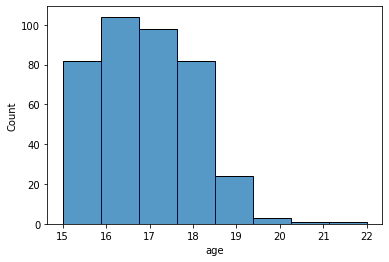

In [12]:
sns.histplot(x=students.age, bins=8)

In [13]:
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [14]:
students.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

<AxesSubplot:xlabel='age'>

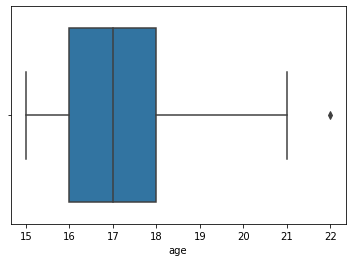

In [15]:
sns.boxplot(x=students.age)

Значение 22 года встречается один раз и находится за правым усом (Q3 + 1.5 * IQR), что является выбросом.

In [16]:
median = students.age.median() #медиана

perc25 = students.age.quantile(0.25) # Q1
perc75 = students.age.quantile(0.75) # Q3
IQR = perc75 - perc25 #межквартильных размах

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Но здравый смысл подсказывает нам, что в соответствии со школьной системой в США, все что > 19 лет - выбросы

In [17]:
students.query('age>19')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytimegranular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


Но в условиях задачи сказано, что мы анализируем учеников в возрасте от 15 до 22 лет.
Значит, данные не считаем выбросом. Но при построении модели к этому вопросу можно вернуться.

In [18]:
# ToDo age>19

# address
тип адреса ученика ('U' - городской, 'R' - за городом)

In [19]:
students.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [20]:
students.address.isna().sum()

17

В данных есть 2 уникальных значения и 17 незаполненных значений. Пока заменять их смысла нет.
Пропусков нет.

# famsize
размер семьи('LE3' <= 3, 'GT3' >3)

In [21]:
students.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [22]:
students.address.isna().sum()

17

В данных есть 2 уникальных значения и 17 незаполненных значений. Пока заменять их смысла нет.
Пропусков нет.

# Pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [23]:
students.pstatus.value_counts()

T    314
A     36
Name: pstatus, dtype: int64

In [24]:
students.pstatus.isna().sum()

45

В данных есть 2 уникальных значения и 45 незаполненных значений. Пока заменять их смысла нет.
Пропусков нет.

# Medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [25]:
students.medu.value_counts().sort_index()

0.0      3
1.0     59
2.0    102
3.0     97
4.0    131
Name: medu, dtype: int64

In [26]:
students.medu.isna().sum()

3

В данных есть 5 уникальных и 3 незаполненных значения. Пока заменять их смысла нет.
Пропусков нет.

Столбец числовой, посомтрим на распределение

([<matplotlib.axis.XTick at 0x12c738c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

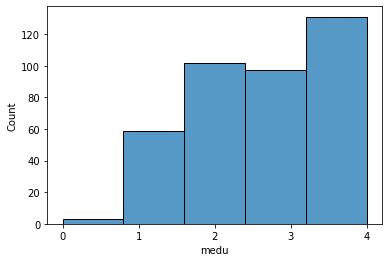

In [74]:
sns.histplot(x=students.medu, bins=5)
plt.xticks([0, 1, 2, 3, 4])


# Fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [28]:
students.fedu.value_counts().sort_index()

0.0       2
1.0      78
2.0     106
3.0      96
4.0      88
40.0      1
Name: fedu, dtype: int64

In [29]:
students.fedu.isna().sum()

24

In [30]:
#students[students.fedu.isna()]

В данных есть 6 уникальных и 24 незаполненных значения.
Значение 40 явно ошибочное, скорее всего там должно быть 4

In [31]:
students.loc[students['fedu'] == 40, 'fedu'] = 4

In [32]:
students.fedu.value_counts().sort_index()

0.0      2
1.0     78
2.0    106
3.0     96
4.0     89
Name: fedu, dtype: int64

Отлично, теперь 5 уникальных значений, как в описании столбца
Пропусков нет.

Столбец числовой, посомтрим на распределение

([<matplotlib.axis.XTick at 0x12c2d9310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

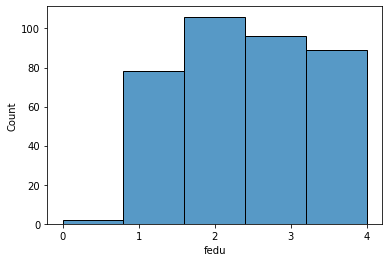

In [73]:
sns.histplot(x=students.fedu, bins=5)
plt.xticks([0, 1, 2, 3, 4])

# Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [33]:
students.mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

In [34]:
students.mjob.isna().sum()

19

В данных есть 5 уникальных и 19 незаполненных значения.
Пропусков нет.

# Fjob
 работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [35]:
students.fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

In [36]:
students.fjob.isna().sum()

36

В данных есть 5 уникальных и 36 незаполненных значения.
Пропусков нет.

# reason
 причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [37]:
students.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [38]:
students.reason.isna().sum()

17

В данных есть 4 уникальных и 17 незаполненных значения.
Пропусков нет.

# guardian
 опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [39]:
students.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [40]:
students.guardian.isna().sum()

31

В данных есть 3 уникальных и 31 незаполненных значения.
Пропусков нет.

# traveltime
 время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [41]:
students.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [42]:
students.traveltime.isna().sum()

28

В данных есть 4 уникальных и 28 незаполненных значения.
Пропусков нет.

Столбец числовой, посомтрим на распределение

([<matplotlib.axis.XTick at 0x110a50ee0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

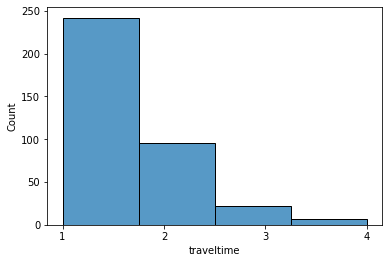

In [70]:
sns.histplot(x=students.traveltime, bins=4)
plt.xticks([1, 2, 3, 4])